<h2 align=center>Supermarket Sales Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

## Setup and Sourcing

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Importing needed libryries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

### Loading Data

In [6]:
df=pd.read_csv('supermarket_sales.csv')

## Initial Data Exploration

In [7]:
df.head() #visualize the first 5 rows

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [8]:
df.tail() #visualize the last 5 rows

Invoice ID Branch      City Customer type  Gender  \
998   347-56-2442      A    Yangon        Normal    Male   
999   849-09-3807      A    Yangon        Member  Female   
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
998       Home and lifestyle       65.82       1.0   3.291   69.111  2/22/19   
999      Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
998   15:33     Cash   65.82                 4.761905         3.291     4.1  
999   13:28     Cash  618.38                 4.761905        30.919     6.6  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [5]:
df.columns #inspect the name of the columsn

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes 

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Analysis:
* As we can see the Date column have data type object instead of Datetime, so lets change this

### Fix Data Type

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Set Date as index

In [12]:
df.set_index('Date', inplace=True)

In [13]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

### Descriptive statistics for quantitative variables

In [15]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.220351e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

## Cleaning the Data

### Fixing Duplicates

In [23]:
df.duplicated().sum()

3

Analysis:
* There are 3 lines that are duplicate

In [28]:
# let's check duplicated lines

df[df.duplicated()==True]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [30]:
#Remove duplicated
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Fixing Missing Values

In [31]:
print(df.isna().sum())
print('__________________')
print(df.isna().sum()/len(df)*100)

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64
__________________
Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              7.9
Gender                     0.0
Product line               4.3
Unit price                 0.6
Quantity                   1.9
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                 

<AxesSubplot:ylabel='Date'>

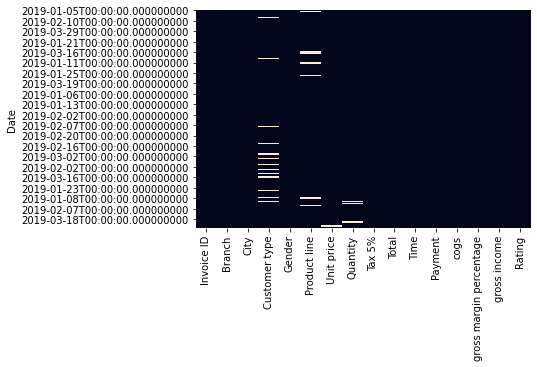

In [33]:
#Visualizing missing values
sns.heatmap(df.isnull(), cbar=False)

Analysis:
* We can see thar Customer tyoe, Product line and Quantity are the variables with more missing values
* how we will deal with the missing values will depende first on the type of the data

<AxesSubplot:ylabel='Date'>

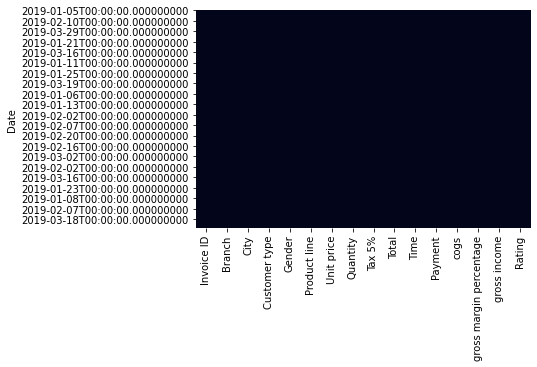

In [34]:
#Feeling the missing values using the mean will only work for numeric variables

df.fillna(np.mean,inplace=True)
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:ylabel='Date'>

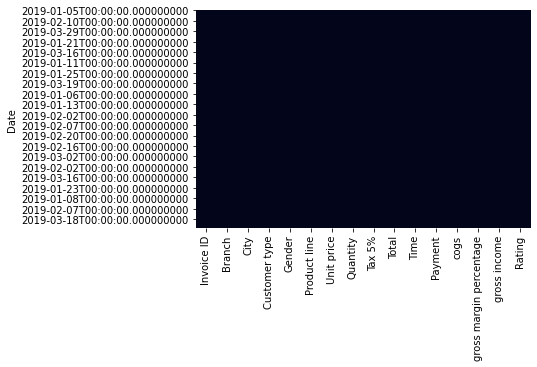

In [35]:
#if our goal is the replace missing values on a qualitative or non numeric variable, them we must replace by the mode
df.fillna(df.mode(). iloc[0])
sns.heatmap(df.isnull(), cbar=False)

## Univariate Analysis

**What does the distribution of customer ratings looks like? Is it skewed?**

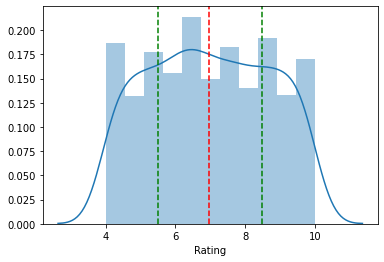

In [16]:
#plotting the distribution of the ratings
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--')
plt.axvline(x=np.percentile (df['Rating'],25),c='green',ls='--', label='25-75 percentile')
plt.axvline(x=np.percentile (df['Rating'],75),c='green',ls='--')

Analysis:
* Te Rating distribution seems to be **Uniform Distribution** 
* There is relatively equal change of rating;
* There iss not seem to be any skewed in right or left direction;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DFE16E46A0>,
      dtype=object)

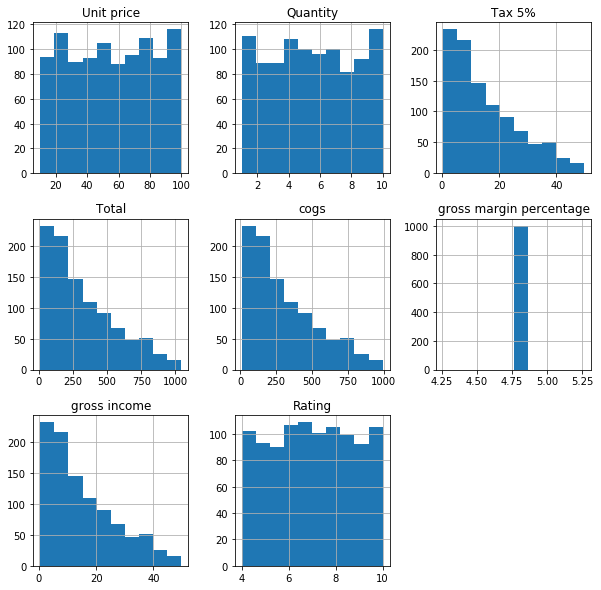

In [14]:
df.hist(figsize=(10,10))

**Do aggregate sales numbers differ by much between branches?**

<AxesSubplot:xlabel='Branch', ylabel='count'>

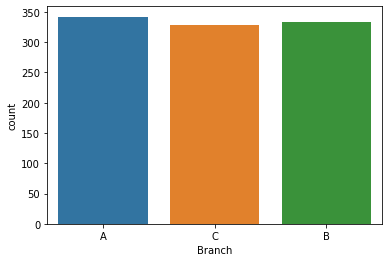

In [17]:
sns.countplot(df['Branch'])

Analysis:
* Sales number do not differ too much between branches.

**Do aggregate sales numbers differ by much between type of payments?**

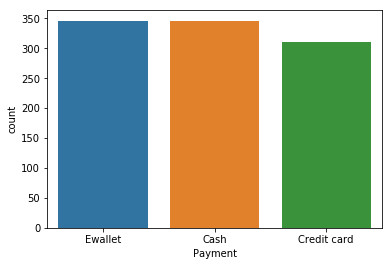

In [16]:
sns.countplot(df['Payment'])

Analysis:
* Ewallet and Cash Payment are relatively more used type of payment.

## Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

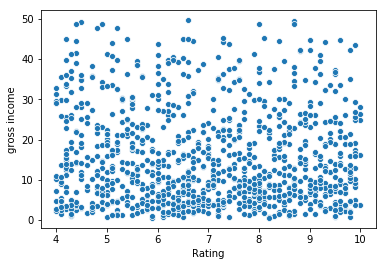

In [17]:
sns.scatterplot(df['Rating'],df['gross income'])

Analysis:
* There is no evident relationship between the amount customer spend on the store ad the overal rating the store.

**Is there a difference Rating across the different branch and also the amount customers spend on the different branches**

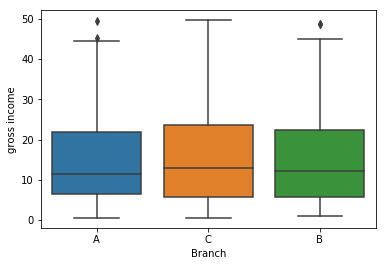

In [18]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

Analysis:
* There is no much variation on the gross income between the different branches.

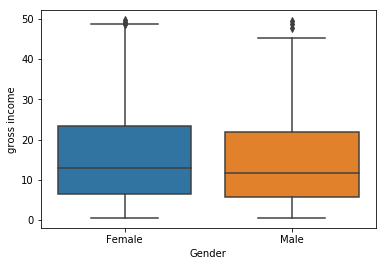

In [19]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Analysis:
* There is no much difference on th amout the two genders spend on the stores.

**Is there a noticeable time trend in gross income?**

To check the trend, as we have multiple sales per day, the first step will be to aggregate the dats

In [20]:
df.groupby(df.index).mean().head()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333

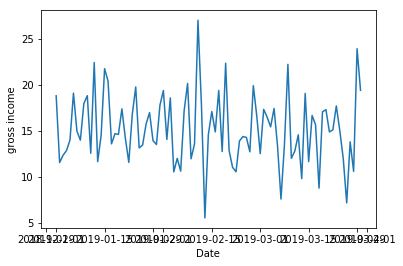

In [21]:
sns.lineplot(x=df.groupby(df.index).mean().index, y=df.groupby(df.index).mean()['gross income'])

there is no trend, the sales varie around the same mean(mean constant across time), but as we are only working with a 3 months, would be more interesting to have more data to confirm presence or absence of a trend on our data

C:\Users\maiam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\maiam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\maiam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\maiam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


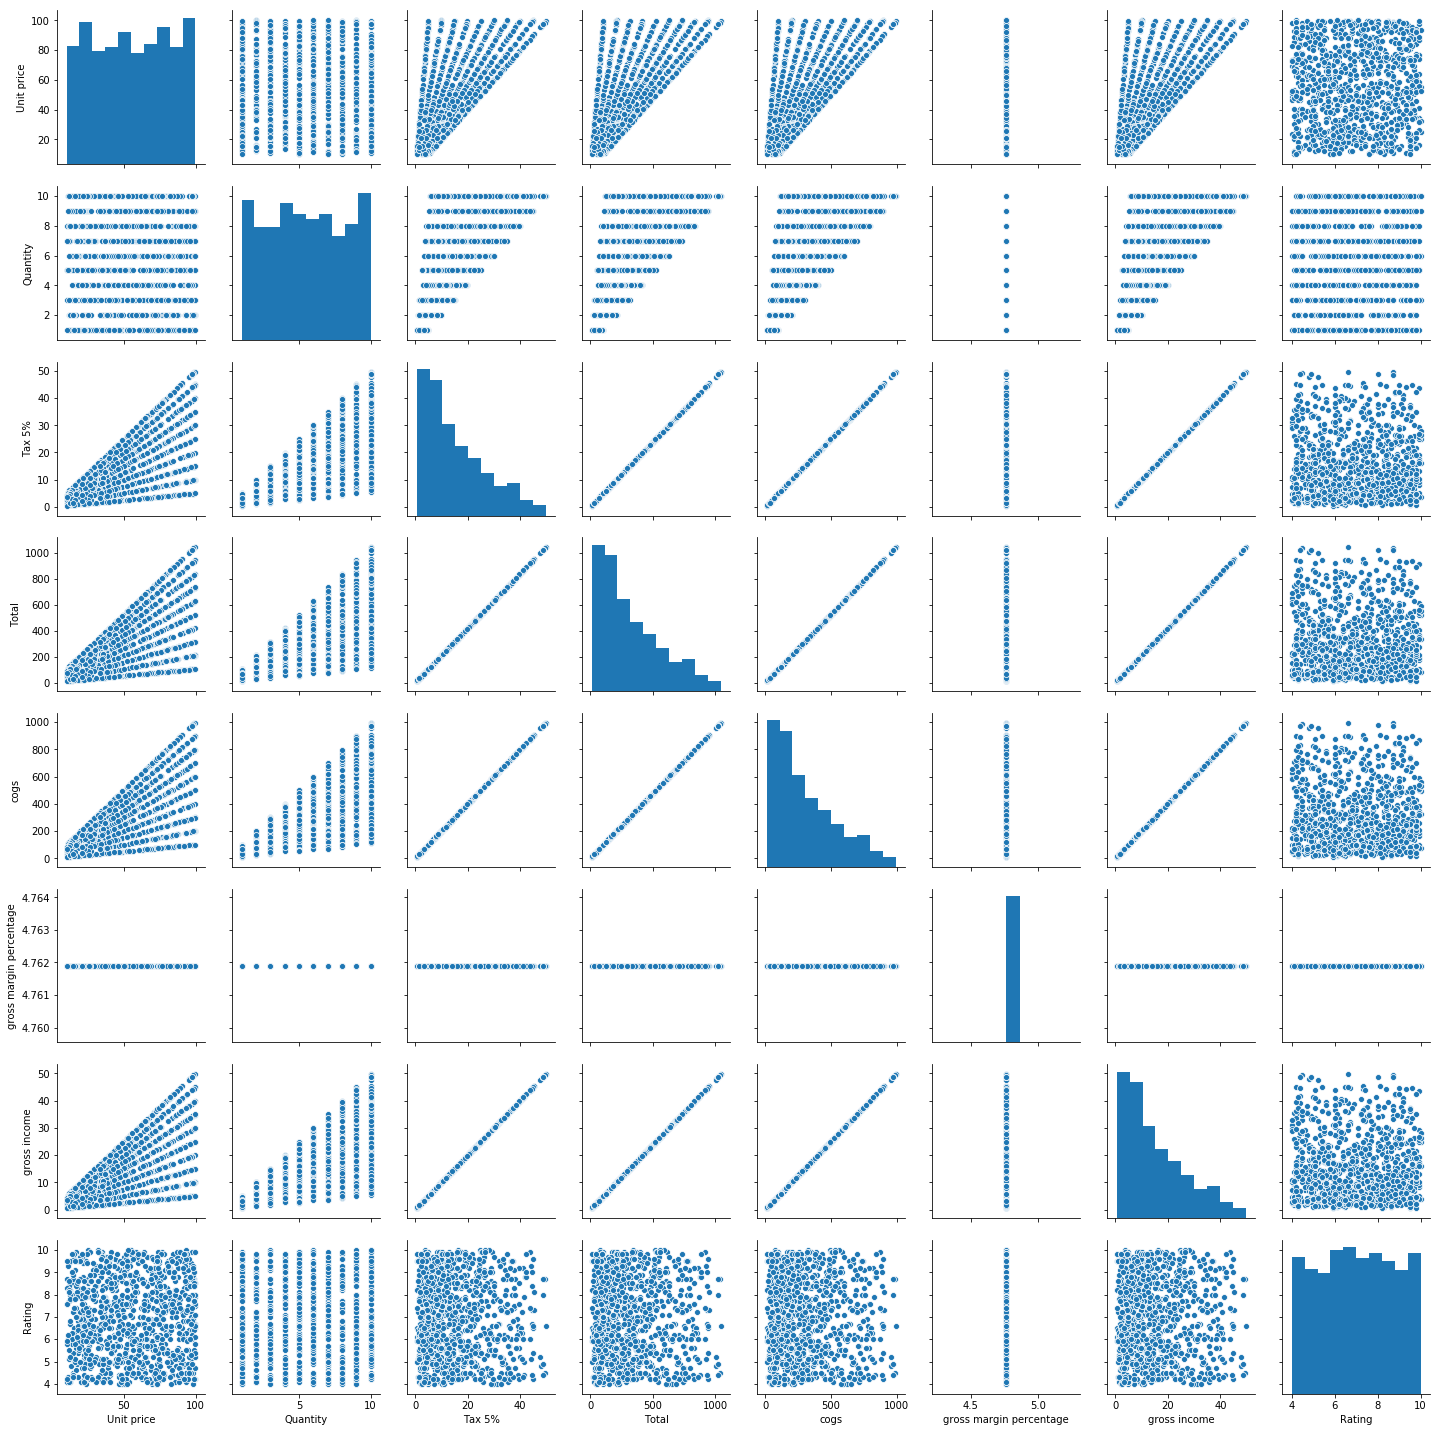

In [22]:
sns.pairplot(df)

### Correlation Analysis

In [41]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

<AxesSubplot:>

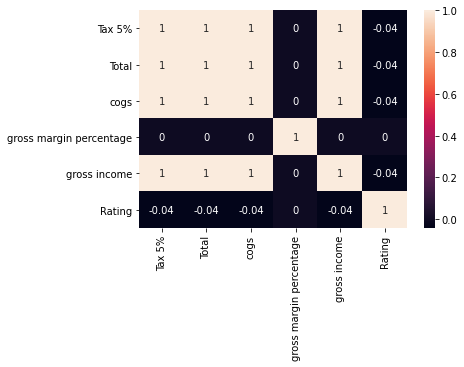

In [44]:
sns.heatmap(np.round(df.corr(),2), annot=True)

## Profile Report

In [37]:
dataset=pd.read_csv('supermarket_sales.csv')

In [33]:
#Correlation matrix
np.round(df.corr(),2)

Tax 5%  Total  cogs  gross margin percentage  \
Tax 5%                     1.00   1.00  1.00                      0.0   
Total                      1.00   1.00  1.00                      0.0   
cogs                       1.00   1.00  1.00                      0.0   
gross margin percentage    0.00   0.00  0.00                      1.0   
gross income               1.00   1.00  1.00                      0.0   
Rating                    -0.04  -0.04 -0.04                      0.0   

                         gross income  Rating  
Tax 5%                           1.00   -0.04  
Total                            1.00   -0.04  
cogs                             1.00   -0.04  
gross margin percentage          0.00    0.00  
gross income                     1.00   -0.04  
Rating                          -0.04    1.00

In [39]:
#from pandas_profiling import ProfileReport

prof = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)
prof

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/